In [150]:
# Here is Homework 1 - Mujeeb Quadri, 9/30/2021

import numpy as np
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
housing = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/mquadriuncc/MLHW/main/Housing.csv'))
housing.head() # First 5 rows displayed just to show the data is being used.

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [34]:
m = len(housing)
m

545

In [16]:
housing.shape

(545, 13)

In [17]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [18]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [100]:
# You can see that your dataset has many columns with values as 'Yes' or 'No'.
# But in order to fit a regression line, we would need numerical values and not string.
# List of variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [137]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respec
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 10)
df_train.shape

(381, 13)

In [55]:
df_test.shape

(164, 13)

In [57]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
175,9800,4,2,2,2,5250000
25,6540,4,2,2,2,8540000
253,3520,2,1,2,0,4515000
257,8250,3,1,1,0,4480000
431,3180,4,1,2,0,3290000


In [67]:
df_Newtrain.shape

(381, 5)

In [75]:
# Here we can see that except for area, all the columns have small integer values.
#So it is extremely important to rescale the variables so that they have a comparable s
#If we don't have comparable scales, then some of the coefficients as obtained by fitti
#This might become very annoying at the time of model evaluation.
##So it is advised to use standardization or normalization so that the units of the coef

#As you know, there are two common ways of rescaling:
#1. Min-Max scaling
#2. Standardisation (mean-0, sigma-1)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# define standard scaler
#scaler = StandardScaler()
scaler = MinMaxScaler()

In [82]:
#df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtrain.head(20)

,area,bedrooms,bathrooms,stories,parking
175,0.582734,0.6,0.5,0.333333,0.666667
25,0.348201,0.6,0.5,0.333333,0.666667
253,0.130935,0.2,0.0,0.333333,0.000000
257,0.471223,0.4,0.0,0.000000,0.000000
431,0.106475,0.6,0.0,0.333333,0.000000
70,0.165468,0.4,0.5,0.333333,0.000000
188,0.289209,0.2,0.0,0.333333,0.000000
305,0.125899,0.4,0.0,0.333333,0.333333
315,0.280576,0.2,0.0,0.000000,0.000000
222,0.537122,0.2,0.0,0.000000,0.666667


In [86]:
#y_Newtrain = df_Newtrain.pop('price')
X_Newtrain = df_Newtrain

In [99]:
#X_Normtrain.head()
#y_Normtrain.head()
#Y = y_Normtrain.values # get input values from first column
#Y
#X0 = df_Normtrain.values[:, 0] # get input values from first column
#X0

In [151]:
# where t = theta, a = alpha, and n = number of repetitions
def costFunction(x, y, t):
    predictions = x.dot(t)
    errors = predictions - y
    cost = ((1/2*m)*(square(errors)))
    return cost

def gradientDescent(x, y, t, a, n):
previousCost = zeros(n)
predictions = x.dot(t)
errors = predictions - y
previousCost[z] = previousCost(x, y, t)
return theta, previousCost

IndentationError: expected an indented block (<ipython-input-151-30beed556269>, line 9)

Text(0, 0.5, 'Cost')

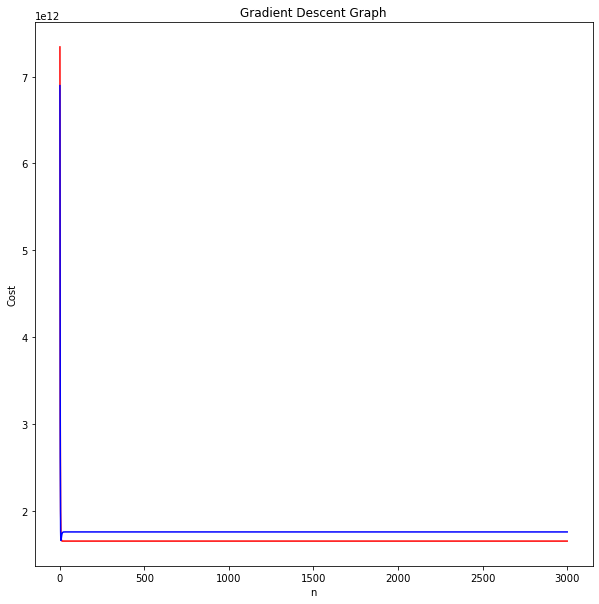

In [149]:
plt.plot(iteration_array, cost_history, color= 'red', label = 'Inputs')
plt.plot(iteration_array, validation_cost, color= 'blue', label = 'Validation Tests')
plt.rcParams["figure.figsize"] = (10,10)
plt.title('Gradient Descent Graph')
plt.xlabel("n")
plt.ylabel("Cost")